# Emissions Scenarios

In [1]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.pyplot as plt
import plots

mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["figure.dpi"] = 150
savefig_dpi = 300
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
import warnings
warnings.filterwarnings("ignore")

FS = 10
plt.rc('text',usetex=True)
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']}) 
plt.rc('savefig',facecolor='white')
plt.rc('axes',facecolor='white')
plt.rc('axes',labelcolor='dimgrey')
plt.rc('axes',labelcolor='dimgrey')
plt.rc('xtick',color='dimgrey')
plt.rc('ytick',color='dimgrey')

In [2]:
FIGURE_DIRECTORY = 'figures/'

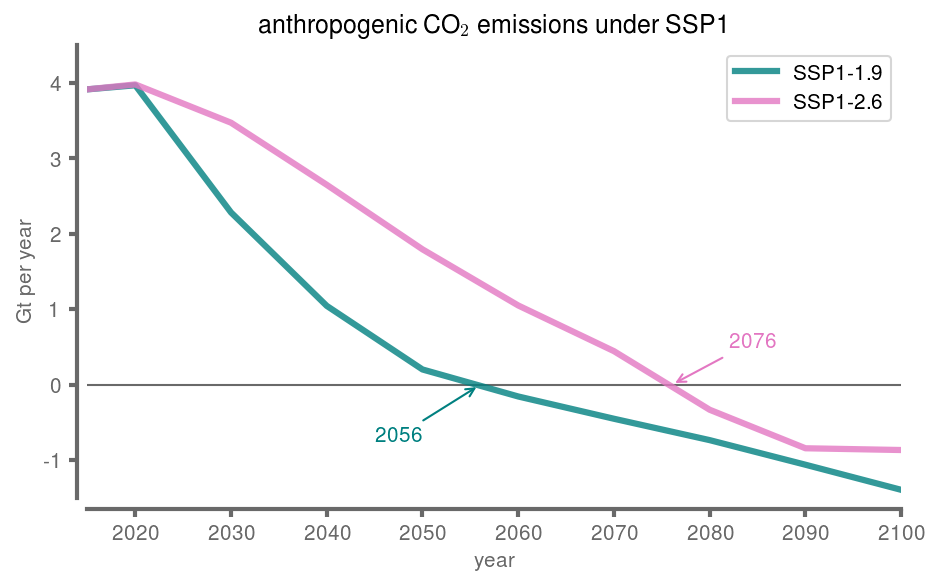

In [3]:
x = [2015,2020,2030,2040,2050,2060,2070,2080,2090,2100]
x_interp = np.arange(2015,2101)
low_color = 'teal'
high_color = 'tab:pink'
alpha = .8


ssp119 = [39152.726,39693.726,22847.271,10475.089, 2050.362, -1525.978,-4476.970,-7308.783,-10565.023,-13889.788]
ssp126 = [39152.726,39804.013,34734.424,26509.183,17963.539,10527.979,4476.328,-3285.043,-8385.183,-8617.786]

ssp119_interp = np.interp(x_interp,x,ssp119)*1000000
ssp126_interp = np.interp(x_interp,x,ssp126)*1000000

i = np.where(ssp119_interp<=0)[0]
ssp119_yr = x_interp[i][0]

i = np.where(ssp126_interp<=0)[0]
ssp126_yr = x_interp[i][0]

#--------------------------------------------------------
plt.figure(figsize=(7,4))
plt.axhline(y=0,color='dimgray',linewidth=1.)

plt.plot(x_interp,ssp119_interp/(10e9),
         linewidth=3,
         color=low_color,
         alpha=alpha,
         label='SSP1-1.9')
plt.plot(x_interp,ssp126_interp/(10e9),
         linewidth=3,     
         color=high_color,         
         alpha=alpha,         
         label='SSP1-2.6')

plt.legend()

plt.annotate(ssp119_yr,(ssp119_yr,0),
             color=low_color,
             xytext=(2045,-.75),
             arrowprops=dict(arrowstyle="->",
                             color=low_color,
                             connectionstyle="arc3"),             
            )

plt.annotate(ssp126_yr,(ssp126_yr,0),
             color=high_color,
             xytext=(2082,.5),
             arrowprops=dict(arrowstyle="->",
                             color=high_color,
                             connectionstyle="arc3"),             
            )



plt.ylabel('Gt per year')
plt.xlabel('year')

plots.format_spines(plt.gca())
plt.xticks(np.arange(2010,2110,10),np.arange(2010,2110,10))
plt.yticks(np.arange(-2,10,1),np.arange(-2,10,1))

plt.xlim(2015,2100)
plt.ylim(-1.5,4.5)

plt.title('anthropogenic CO$_2$ emissions under SSP1')


plots.savefig(FIGURE_DIRECTORY + 'ssp1_emissions.png')
plt.show()

